In [15]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sqlalchemy import create_engine
import pandas as pd

# Define the fetch_data function
def fetch_data(query):
    # Use SQLAlchemy for the connection
    engine = create_engine("mysql+pymysql://root:@localhost:3306/DB_loan")
    with engine.connect() as connection:
        data = pd.read_sql(query, connection)
    return data

# Query the database
query = "SELECT * FROM bank_personal_loan_modelling_1"
df = fetch_data(query)

# Display the DataFrame
print(df.head())

  COL 1 COL 2       COL 3   COL 4     COL 5   COL 6  COL 7      COL 8  \
0    ID   Age  Experience  Income  ZIP Code  Family  CCAvg  Education   
1     1    25           1      49     91107       4   1.60          1   
2     2    45          19      34     90089       3   1.50          1   
3     3    39          15      11     94720       1   1.00          1   
4     4    35           9     100     94112       1   2.70          2   

      COL 9         COL 10              COL 11      COL 12  COL 13      COL 14  
0  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard  
1         0              0                   1           0       0           0  
2         0              0                   1           0       0           0  
3         0              0                   0           0       0           0  
4         0              0                   0           0       0           0  


In [17]:
print(df.columns)

Index(['COL 1', 'COL 2', 'COL 3', 'COL 4', 'COL 5', 'COL 6', 'COL 7', 'COL 8',
       'COL 9', 'COL 10', 'COL 11', 'COL 12', 'COL 13', 'COL 14'],
      dtype='object')


In [18]:
df.columns = [
    'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 
    'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 
    'Securities Account', 'CD Account', 'Online', 'CreditCard'
]

In [19]:
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [21]:
print(X.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0  Age  Experience  Income  Family  CCAvg  Education  Mortgage   
1   25           1      49       4   1.60          1         0   
2   45          19      34       3   1.50          1         0   
3   39          15      11       1   1.00          1         0   
4   35           9     100       1   2.70          2         0   

   Securities Account  CD Account  Online  CreditCard  
0  Securities Account  CD Account  Online  CreditCard  
1                   1           0       0           0  
2                   1           0       0           0  
3                   0           0       0           0  
4                   0           0       0           0  


In [22]:
df = df[1:]  # 删除第一行
df.reset_index(drop=True, inplace=True)  # 重置索引

In [24]:
print("Columns:", df.columns)
print("Head of DataFrame:")
print(df.head())

Columns: Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')
Head of DataFrame:
  Age Experience Income Family CCAvg Education Mortgage Personal Loan  \
0  25          1     49      4  1.60         1        0             0   
1  45         19     34      3  1.50         1        0             0   
2  39         15     11      1  1.00         1        0             0   
3  35          9    100      1  2.70         2        0             0   
4  35          8     45      4  1.00         2        0             0   

  Securities Account CD Account Online CreditCard  
0                  1          0      0          0  
1                  1          0      0          0  
2                  0          0      0          0  
3                  0          0      0          0  
4                  0          0      0          1  


In [ ]:

X = df.drop(columns=['Personal Loan'])  
y = df['Personal Loan']                 


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 定义神经网络结构
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # 输入层 + 隐藏层
    Dropout(0.2),                                              # Dropout 防止过拟合
    Dense(32, activation='relu'),                              # 隐藏层
    Dropout(0.2),                                              # Dropout
    Dense(1, activation='sigmoid')                             # 输出层（二分类问题用 sigmoid）
])

# 编译模型
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # 二分类问题的损失函数
    metrics=['accuracy']
)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


float64
object


In [33]:
# 开始训练模型
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,          # 训练50个周期，可以根据需求调整
    batch_size=32,      # 每次训练使用32个样本
    verbose=1           # 显示训练过程的详细信息
)

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8474 - loss: 0.4350 - val_accuracy: 0.9313 - val_loss: 0.1759
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9435 - loss: 0.1663 - val_accuracy: 0.9600 - val_loss: 0.1123
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.9504 - loss: 0.1276 - val_accuracy: 0.9707 - val_loss: 0.0885
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.9673 - loss: 0.1016 - val_accuracy: 0.9747 - val_loss: 0.0776
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.9716 - loss: 0.0812 - val_accuracy: 0.9787 - val_loss: 0.0716
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.9666 - loss: 0.0889 - val_accuracy: 0.9767 - val_loss: 0.0685
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.9722 - loss: 0.0867 - val_accuracy: 0.9780 - val_loss: 0.0659
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.9697 - loss: 0.0860 - va

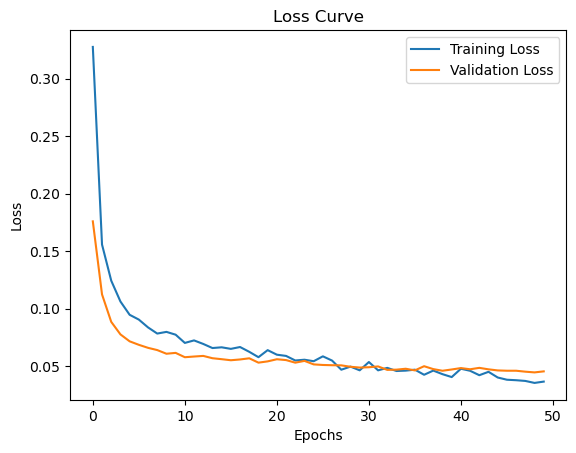

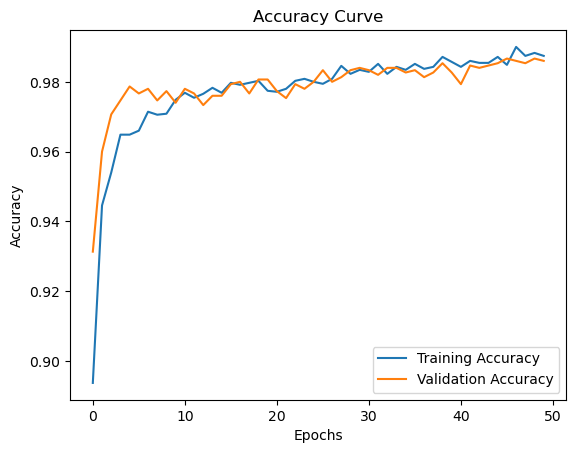

In [34]:
import matplotlib.pyplot as plt

# 绘制损失曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# 绘制准确率曲线
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [35]:
# 评估模型
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.0455
Test Accuracy: 0.9860


In [36]:
from sklearn.metrics import classification_report

# 生成预测结果
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# 打印分类报告
print(classification_report(y_test, y_pred))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1343
         1.0       0.98      0.89      0.93       157

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500

